In [1]:
import subprocess
import os

import pandas as pd
import numpy as np

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import matplotlib.pyplot as plt


from sklearn import linear_model
from scipy import signal
from dash.dependencies import Input, Output,State
from datetime import datetime
from scipy import optimize
from scipy import integrate

import requests
import json

/tmp/ipykernel_102269/1004824563.py:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_102269/1004824563.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# SIR Modelling

In [2]:
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")
data_path='data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


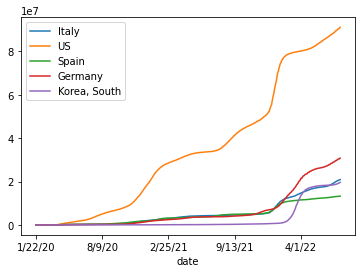

In [3]:
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({'date':time_idx})

country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ]

for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    
df_plot.set_index('date').plot()

time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

df_plot['date']=time_idx

df_plot.to_csv('data/processed/COVID_small_flat_table.csv',sep=';',index=False)
df_plot.head()

In [4]:
df_analyse=pd.read_csv('data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)
df_analyse.columns

Index(['date', 'Italy', 'US', 'Spain', 'Germany', 'Korea, South'], dtype='object')

In [5]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [6]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


# Fitting the parameters of SIR model
the SIR model is assuming a very simplistic curve
however we can find situations (time windows) where the model might apply

In [7]:
Start_index = 40
End_index = 190

In [8]:
df_covid = pd.read_csv('data/raw/covid_full_data.csv', ';')
df_covid.head()

/home/pka/playground/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


start infected: 120
cumulative sum of invected after period 282641
Number of days 150
N0 50000000
standard deviation errors :  [0.02030405 0.02020608]  start infect: 120
Optimal parameters: beta = 0.7100895215767946  and gamma =  0.629180572459916


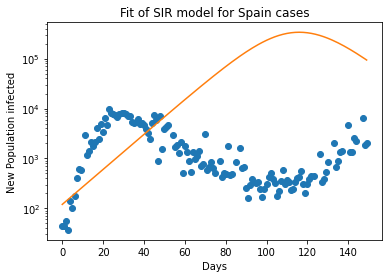

Optimal parameters: beta = 0.7100895215767946  and gamma =  0.629180572459916
Basic Reproduction Number R0  1.1285941630405842
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [9]:
ydata_sp = np.array(df_analyse['Spain'][Start_index:End_index])
t_sp=np.arange(len(ydata_sp))
N0_sp=50000000

I0_sp=ydata_sp[0]
S0_sp=N0_sp-I0_sp
R0_sp=0
print('start infected:',I0_sp)
print('cumulative sum of invected after period',ydata_sp[-1])
print('Number of days',len(ydata_sp))
print('N0',N0_sp)

#beta_It = 0.5
#gamma_It = 0.2
def SIR_model_t_sp(SIR,t_sp,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0_sp       #S*I is the 
    dI_dt=beta*S*I/N0_sp-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

def fit_odeint_sp(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t_sp, (S0_sp, I0_sp, R0_sp), t_sp, args=(beta, gamma))[:,1] # we only would like to get dI

popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
perr_sp = np.sqrt(np.diag(pcov_sp))
    
print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

# get the final fitted curve / predict the outcome 
fitted_sp=fit_odeint_sp(t_sp, *popt_sp)

plt.semilogy(t_sp,np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]), 'o')
plt.semilogy(t_sp, fitted_sp)

plt.title("Fit of SIR model for Spain cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])
print("Basic Reproduction Number R0 " , popt_sp[0]/ popt_sp[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")


In [ ]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np
import dash
import io
import base64

dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State
import mpld3

import plotly.graph_objects as go

import os
print(os.getcwd())
    

#df_input_large=pd.read_csv('data/processed/COVID_final_set.csv',sep=';')
df_input_large=df_analyse
df_covid = pd.read_csv('data/raw/covid_full_data.csv', ';')
#data_dict = {'Spain':[ydata_sp, fitted_sp, t_sp], 'Germany': [ydata, fitted, t], 'US': [ydata_us, fitted_us, t_us], 'Italy': [ydata_It, fitted_It, t_It],
#            'Korea, South': [ydata_sk, fitted_sk, t_sk]}
fig = go.Figure()
#countries = [country.lower() for country in df_covid['location']]


app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  SIR Modeling on Covid-19 Data
    Initial records from 40-150 days are taken into consideration as it 
    can be well represented with the SIR model considering it as the first wave
    '''),

    dcc.Markdown('''
    ## Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_analyse.columns[1:].unique()],
        value='Germany' # which are pre-selected
        #multi=True
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
    #html.Iframe(
    #id = 'main_window_slope',
    #value = None,
    #style = {}
    #)
])

#N0=0
#I0=0
#S0=0
#R0=0
#t = 0
@app.callback(
    Output('main_window_slope', 'figure'),
    Input('country_drop_down', 'value'))
def update_figure(country):
    #plt.semilogy(t, ydata, 'o')
    #plt.semilogy(t, fitted)
    #traces = []
   # print(f'country {country}')
   # print(f'type(country) {type(country)}')
    
    ydata_sp = np.array(df_analyse[country][Start_index:End_index])
    t_sp=np.arange(len(ydata_sp))
    
    if(country == 'US'):
        country = 'United States'
    elif(country == 'Korea, South'):
        country = 'South Korea'
    print(df_covid['location'].unique())
    df_country = df_covid[df_covid['location'] == country]
    population = int(df_country['population'].iloc[0] * 0.1)
    print(f'population {population}')
    
    N0_sp=population

    I0_sp=ydata_sp[0]
    S0_sp=N0_sp-I0_sp
    R0_sp=0
    
    popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
    perr_sp = np.sqrt(np.diag(pcov_sp))
    
    print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
    print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

    # get the final fitted curve / predict the outcome 
    fitted_sp=fit_odeint_sp(t_sp, *popt_sp)
    
    traces = []
    traces.append(dict(x=t_sp,
                       y=np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]),
                       #y=data_dict[country][0],
                                #y=fitted,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='markers',
                                opacity=0.9,
                                name='Cases in '+ country
                                #log_x=True
                        ))
    traces.append(dict(x=t_sp,#y=np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]),
                                y=fitted_sp,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='lines',
                                opacity=0.9,
                                name='SIR fitted Curve ' + country 
                                
                        ))
    my_yaxis={'type':"log",
               'title':'New Population infected'
              }

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Days',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                
                #log_x=True

                yaxis=my_yaxis
        )
    }
    
    
    

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)


/home/pka/Documents/Sem_3/EDS


/home/pka/playground/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


Dash is running on http://127.0.0.1:8050/



 * Tip: There are .env or .flaskenv files present. Do "pip install python-dotenv" to use them.


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European U

/tmp/ipykernel_102269/956742162.py:30: RuntimeWarning:

overflow encountered in double_scalars

/tmp/ipykernel_102269/956742162.py:31: RuntimeWarning:

overflow encountered in double_scalars

/tmp/ipykernel_102269/956742162.py:31: RuntimeWarning:

invalid value encountered in double_scalars

/home/pka/playground/venv/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



standard deviation errors :  [0.02100832 0.02088876]  start infect: 150
Optimal parameters: beta = 0.7844860863079438  and gamma =  0.7060707789977995
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'E

/home/pka/playground/venv/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



 intdy--  t (=r1) illegal        
standard deviation errors :       in above message,  r1 =  0.4200000000000D+02
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.4156582250608D+02   r2 =  0.4157456984019D+02
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.4300000000000D+02
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.4156582250608D+02   r2 =  0.4157456984019D+02
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.4300000000000D+02
 [0.00442489 0.00412262]  start infect: 55
Optimal parameters: beta = 0.24168002407427377  and gamma =  0.15144336840370415
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhut

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.4200000000000D+02
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.4156582250608D+02   r2 =  0.4157456984019D+02
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.4300000000000D+02
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.4156582250608D+02   r2 =  0.4157456984019D+02
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.4300000000000D+02
standard deviation errors :  [0.00442489 0.00412262]  start infect: 55
Optimal parameters: beta = 0.24168002407427377  and gamma =  0.15144336840370415
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhut

standard deviation errors :  [0.02100832 0.02088876]  start infect: 150
Optimal parameters: beta = 0.7844860863079438  and gamma =  0.7060707789977995
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'E

Optimal parameters: beta = 0.24168002407427377  and gamma =  0.15144336840370415
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'F